In [168]:
from pyforest import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [169]:
anz = pd.read_csv('ANZ synthesised transaction dataset (1).csv')
anz.head()

<IPython.core.display.Javascript object>

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [170]:
anz.shape

(12043, 23)

In [171]:
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [172]:
anz.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [173]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null 

In [174]:
anz.memory_usage(deep=True)

Index                    128
status                789577
card_present_flag      96344
bpay_biller_code      411980
account               851892
currency              722580
long_lat              843133
txn_description       768666
merchant_id           856113
merchant_code          96344
first_name            762310
balance                96344
date                  806881
gender                746666
age                    96344
merchant_suburb       651255
merchant_state        599732
extraction           1023655
amount                 96344
transaction_id       1071827
country               794838
customer_id           851923
merchant_long_lat     676827
movement              747549
dtype: int64

In [175]:
anz.bpay_biller_code.value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [176]:
anz.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [177]:
anz.merchant_code.value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [178]:
anz.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
6464e14d-4b6c-43f2-8635-061c7fd80568     1
42b308f7-2613-46b6-a56b-67d15b4c0394     1
30b7c23d-ddcf-4cdd-b60f-af96e58acd4a     1
334f9bdd-fb72-489b-8bf3-49487ef23bef     1
a91d611a-3bf1-4eec-9c7f-640426690c37     1
Name: merchant_id, Length: 5725, dtype: int64

In [179]:
anz.merchant_suburb.value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Sans Souci         1
Langford           1
Woombye            1
Cairns North       1
East Corrimal      1
Name: merchant_suburb, Length: 1609, dtype: int64

In [180]:
anz.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [181]:
anz.merchant_long_lat.value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
149.11 -35.35      1
145.16 -38.01      1
153.09 -27.47      1
115.92 -32.12      1
115.84 -32.13      1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [182]:
print(anz.amount.max())
print(anz.amount.min())

8835.98
0.1


In [183]:
print(anz.amount.median())

29.0


In [184]:
print(anz.amount.mean())   #Average transaction amount

187.93358797641767


In [185]:
anz.loc['01-08-2018':'31-08-2018']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,authorized,1.0,NaN,ACC-2249586092,AUD,115.98 -32.07,POS,c1186f92-1fa9-4e07-bebc-50cb972af694,NaN,Edward,...,19,Midland,WA,2018-08-25T15:48:21.000+0000,8.70,fa2cc11fad7441fba1bd233cda51887c,Australia,CUS-443776336,116.01 -31.89,debit
3096,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,78dadc29-bcee-4c16-992b-7e77841b166e,NaN,Stephanie,...,53,Brisbane,QLD,2018-08-25T15:59:20.000+0000,19.96,3401a2088e3d494fa10a22c7947b0857,Australia,CUS-1005756958,152.95 -27.45,debit
3097,posted,NaN,NaN,ACC-2920611728,AUD,144.96 -37.76,PAYMENT,NaN,NaN,Tyler,...,69,NaN,NaN,2018-08-25T16:00:00.000+0000,17.00,7472eb02e78648129f284d1697f5285b,Australia,CUS-1388323263,NaN,debit
3098,posted,NaN,NaN,ACC-37709441,AUD,153.41 -28.01,PHONE BANK,NaN,NaN,Charles,...,18,NaN,NaN,2018-08-25T16:00:00.000+0000,21.00,438f5675c1d44503aca21b2997fe8e9a,Australia,CUS-3336454548,NaN,debit


In [186]:
anz.loc['01-08-2018':'31-08-2018']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,authorized,1.0,NaN,ACC-2249586092,AUD,115.98 -32.07,POS,c1186f92-1fa9-4e07-bebc-50cb972af694,NaN,Edward,...,19,Midland,WA,2018-08-25T15:48:21.000+0000,8.70,fa2cc11fad7441fba1bd233cda51887c,Australia,CUS-443776336,116.01 -31.89,debit
3096,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,78dadc29-bcee-4c16-992b-7e77841b166e,NaN,Stephanie,...,53,Brisbane,QLD,2018-08-25T15:59:20.000+0000,19.96,3401a2088e3d494fa10a22c7947b0857,Australia,CUS-1005756958,152.95 -27.45,debit
3097,posted,NaN,NaN,ACC-2920611728,AUD,144.96 -37.76,PAYMENT,NaN,NaN,Tyler,...,69,NaN,NaN,2018-08-25T16:00:00.000+0000,17.00,7472eb02e78648129f284d1697f5285b,Australia,CUS-1388323263,NaN,debit
3098,posted,NaN,NaN,ACC-37709441,AUD,153.41 -28.01,PHONE BANK,NaN,NaN,Charles,...,18,NaN,NaN,2018-08-25T16:00:00.000+0000,21.00,438f5675c1d44503aca21b2997fe8e9a,Australia,CUS-3336454548,NaN,debit


In [187]:
group = anz.groupby('date')
monthly_average = group.aggregate({'amount':np.mean})
monthly_average

<IPython.core.display.Javascript object>

,amount
date,
01-08-2018,218.014161
01-09-2018,50.079489
01-10-2018,396.340097
02-08-2018,143.331053
02-09-2018,40.295891
...,...
30-08-2018,145.556154
30-09-2018,56.434206
30-10-2018,247.891461


The above code gives us the output of average of amount's transaction per day. For example, on 1st August the average transaction was about 218 AUD.

In [188]:
anz['Transactions'] = anz.groupby('date')['movement'].transform('count')
anz

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Transactions
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,137
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,137
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,137
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,137
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,141
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,141
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,141
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,141


In [189]:
group1 = anz.groupby(['date','Transactions'])
monthly_average = group.aggregate({'Transactions':np.mean})
monthly_average

<IPython.core.display.Javascript object>

,Transactions
date,
01-08-2018,137
01-09-2018,137
01-10-2018,103
02-08-2018,152
02-09-2018,129
...,...
30-08-2018,143
30-09-2018,107
30-10-2018,89


The above code gives us the output of total transactions made every day.

In [190]:
anz.Transactions.count()

12043

In [191]:
anz.drop(columns=['bpay_biller_code','merchant_id','merchant_code','transaction_id','customer_id','extraction','merchant_long_lat','first_name','country','currency','long_lat','Transactions','card_present_flag'], inplace=True, axis=1)

In [192]:
anz.shape

(12043, 11)

In [193]:
anz.isnull().sum()

status                0
account               0
txn_description       0
balance               0
date                  0
gender                0
age                   0
merchant_suburb    4326
merchant_state     4326
amount                0
movement              0
dtype: int64

In [194]:
anz.loc[anz.movement == 'debit']

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,authorized,ACC-1598451071,POS,35.39,01-08-2018,F,26,Ashmore,QLD,16.25,debit
1,authorized,ACC-1598451071,SALES-POS,21.20,01-08-2018,F,26,Sydney,NSW,14.19,debit
2,authorized,ACC-1222300524,POS,5.71,01-08-2018,M,38,Sydney,NSW,6.42,debit
3,authorized,ACC-1037050564,SALES-POS,2117.22,01-08-2018,F,40,Buderim,QLD,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,17.95,01-08-2018,F,26,Mermaid Beach,QLD,3.25,debit
...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,ACC-3021093232,POS,14054.14,31-10-2018,F,30,Ringwood,VIC,9.79,debit
12039,authorized,ACC-1608363396,SALES-POS,9137.79,31-10-2018,M,20,Casula,NSW,63.87,debit
12040,authorized,ACC-3827517394,POS,45394.57,31-10-2018,M,28,Kings Park,NSW,43.96,debit
12041,authorized,ACC-2920611728,SALES-POS,11350.67,31-10-2018,M,69,Oakleigh,VIC,30.77,debit


In [195]:
anz.loc[anz.movement == 'credit']

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
50,posted,ACC-588564840,PAY/SALARY,8342.11,01-08-2018,M,23,NaN,NaN,3903.95,credit
61,posted,ACC-1650504218,PAY/SALARY,2040.58,01-08-2018,F,23,NaN,NaN,1626.48,credit
64,posted,ACC-3326339947,PAY/SALARY,3158.51,01-08-2018,M,22,NaN,NaN,983.36,credit
68,posted,ACC-3541460373,PAY/SALARY,2517.66,01-08-2018,M,24,NaN,NaN,1408.08,credit
70,posted,ACC-2776252858,PAY/SALARY,2271.79,01-08-2018,F,43,NaN,NaN,1068.04,credit
...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,ACC-1973887809,PAY/SALARY,9378.51,31-10-2018,M,26,NaN,NaN,1098.91,credit
12000,posted,ACC-819621312,PAY/SALARY,3440.01,31-10-2018,F,30,NaN,NaN,1158.15,credit
12001,posted,ACC-2920611728,PAY/SALARY,11381.44,31-10-2018,M,69,NaN,NaN,1043.12,credit
12003,posted,ACC-1799207998,PAY/SALARY,11454.52,31-10-2018,F,20,NaN,NaN,1395.49,credit


In [196]:
anz.loc[anz.status =='posted']

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
5,posted,ACC-1608363396,PAYMENT,1705.43,01-08-2018,M,20,NaN,NaN,163.0,debit
9,posted,ACC-602667573,INTER BANK,466.58,01-08-2018,M,40,NaN,NaN,21.0,debit
10,posted,ACC-2171593283,PAYMENT,4348.50,01-08-2018,M,19,NaN,NaN,27.0,debit
11,posted,ACC-2776252858,PAYMENT,1203.75,01-08-2018,F,43,NaN,NaN,29.0,debit
13,posted,ACC-588564840,INTER BANK,4438.16,01-08-2018,M,23,NaN,NaN,25.0,debit
...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,ACC-2173390920,PHONE BANK,13537.75,31-10-2018,M,27,NaN,NaN,67.0,debit
12032,posted,ACC-1710017148,PAYMENT,20699.90,31-10-2018,F,19,NaN,NaN,33.0,debit
12035,posted,ACC-1973887809,PAYMENT,9349.51,31-10-2018,M,26,NaN,NaN,29.0,debit
12036,posted,ACC-1349834573,PAYMENT,18127.50,31-10-2018,M,39,NaN,NaN,32.0,debit


In [197]:
anz['merchant_suburb'] = anz['merchant_suburb'].replace(np.NaN,'None')

<IPython.core.display.Javascript object>

In [198]:
anz['merchant_state'] = anz['merchant_state'].replace(np.NaN,'None')

<IPython.core.display.Javascript object>

In [199]:
anz.isnull().sum()

status             0
account            0
txn_description    0
balance            0
date               0
gender             0
age                0
merchant_suburb    0
merchant_state     0
amount             0
movement           0
dtype: int64

In [200]:
anz.head()

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,authorized,ACC-1598451071,POS,35.39,01-08-2018,F,26,Ashmore,QLD,16.25,debit
1,authorized,ACC-1598451071,SALES-POS,21.20,01-08-2018,F,26,Sydney,NSW,14.19,debit
2,authorized,ACC-1222300524,POS,5.71,01-08-2018,M,38,Sydney,NSW,6.42,debit
3,authorized,ACC-1037050564,SALES-POS,2117.22,01-08-2018,F,40,Buderim,QLD,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,17.95,01-08-2018,F,26,Mermaid Beach,QLD,3.25,debit


In [201]:
anz.loc[(anz.status == 'authorized') & (anz.merchant_state == 'QLD')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,authorized,ACC-1598451071,POS,35.39,01-08-2018,F,26,Ashmore,QLD,16.25,debit
3,authorized,ACC-1037050564,SALES-POS,2117.22,01-08-2018,F,40,Buderim,QLD,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,17.95,01-08-2018,F,26,Mermaid Beach,QLD,3.25,debit
15,authorized,ACC-1903037542,POS,2.85,01-08-2018,M,30,Mount Ommaney,QLD,10.79,debit
28,authorized,ACC-2673069055,SALES-POS,11525.54,01-08-2018,M,24,Pacific Paradise,QLD,14.49,debit
...,...,...,...,...,...,...,...,...,...,...,...
12013,authorized,ACC-1598451071,SALES-POS,2220.14,31-10-2018,F,26,Brisbane City,QLD,16.30,debit
12015,authorized,ACC-1598451071,POS,2194.26,31-10-2018,F,26,Mudgeeraba,QLD,25.88,debit
12018,authorized,ACC-3100725361,POS,10471.98,31-10-2018,M,25,Smithfield,QLD,34.31,debit
12028,authorized,ACC-1598451071,SALES-POS,2134.86,31-10-2018,F,26,Browns Plains,QLD,13.20,debit


In [202]:
anz.loc[(anz.status == 'authorized') & (anz.merchant_state == 'NSW')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
1,authorized,ACC-1598451071,SALES-POS,21.20,01-08-2018,F,26,Sydney,NSW,14.19,debit
2,authorized,ACC-1222300524,POS,5.71,01-08-2018,M,38,Sydney,NSW,6.42,debit
20,authorized,ACC-1598451071,POS,3.85,01-08-2018,F,26,Byron Bay,NSW,14.10,debit
21,authorized,ACC-2890243754,POS,275.93,01-08-2018,M,37,Lismore,NSW,24.77,debit
24,authorized,ACC-966140392,POS,793.64,01-08-2018,M,21,Chatswood,NSW,72.12,debit
...,...,...,...,...,...,...,...,...,...,...,...
12030,authorized,ACC-1443681913,SALES-POS,5610.78,31-10-2018,M,31,Sydney,NSW,234.90,debit
12031,authorized,ACC-1443681913,SALES-POS,5540.27,31-10-2018,M,31,Marrickville,NSW,70.51,debit
12039,authorized,ACC-1608363396,SALES-POS,9137.79,31-10-2018,M,20,Casula,NSW,63.87,debit
12040,authorized,ACC-3827517394,POS,45394.57,31-10-2018,M,28,Kings Park,NSW,43.96,debit


In [203]:
anz.loc[(anz.status == 'authorized') & (anz.merchant_state == 'VIC')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
6,authorized,ACC-2776252858,SALES-POS,1248.36,01-08-2018,F,43,Kalkallo,VIC,61.06,debit
7,authorized,ACC-2776252858,POS,1232.75,01-08-2018,F,43,Melbourne,VIC,15.61,debit
19,authorized,ACC-4258502723,POS,708.28,01-08-2018,F,24,Brunswick,VIC,7.37,debit
23,authorized,ACC-2615038700,POS,30583.15,01-08-2018,F,43,Mordialloc,VIC,12.08,debit
32,authorized,ACC-4258502723,SALES-POS,698.61,01-08-2018,F,24,Doncaster,VIC,9.67,debit
...,...,...,...,...,...,...,...,...,...,...,...
11996,authorized,ACC-3100725361,POS,10506.29,31-10-2018,M,25,Yarra Junction,VIC,8.52,debit
12024,authorized,ACC-1652235822,SALES-POS,22324.96,31-10-2018,F,38,Broadmeadows,VIC,17.72,debit
12029,authorized,ACC-1652235822,SALES-POS,22231.50,31-10-2018,F,38,Docklands,VIC,93.46,debit
12038,authorized,ACC-3021093232,POS,14054.14,31-10-2018,F,30,Ringwood,VIC,9.79,debit


In [204]:
print(anz.balance.max())
print(anz.balance.min())

267128.52
0.24


In [205]:
anz.loc[anz.balance == 267128.52]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
10467,posted,ACC-2014856841,PAY/SALARY,267128.52,19-10-2018,M,46,None,None,2179.96,credit


In [206]:
anz.loc[anz.balance == 0.24]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
792,authorized,ACC-1217063613,POS,0.24,07-08-2018,F,27,Lara,VIC,14.73,debit


In [207]:
anz.loc[(anz.gender == 'M') & (anz.status == 'authorized')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
2,authorized,ACC-1222300524,POS,5.71,01-08-2018,M,38,Sydney,NSW,6.42,debit
15,authorized,ACC-1903037542,POS,2.85,01-08-2018,M,30,Mount Ommaney,QLD,10.79,debit
21,authorized,ACC-2890243754,POS,275.93,01-08-2018,M,37,Lismore,NSW,24.77,debit
24,authorized,ACC-966140392,POS,793.64,01-08-2018,M,21,Chatswood,NSW,72.12,debit
28,authorized,ACC-2673069055,SALES-POS,11525.54,01-08-2018,M,24,Pacific Paradise,QLD,14.49,debit
...,...,...,...,...,...,...,...,...,...,...,...
12033,authorized,ACC-3100725361,SALES-POS,10445.39,31-10-2018,M,25,Smithfield,QLD,26.59,debit
12039,authorized,ACC-1608363396,SALES-POS,9137.79,31-10-2018,M,20,Casula,NSW,63.87,debit
12040,authorized,ACC-3827517394,POS,45394.57,31-10-2018,M,28,Kings Park,NSW,43.96,debit
12041,authorized,ACC-2920611728,SALES-POS,11350.67,31-10-2018,M,69,Oakleigh,VIC,30.77,debit


In [208]:
anz.loc[(anz.gender == 'F') & (anz.status == 'authorized')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,authorized,ACC-1598451071,POS,35.39,01-08-2018,F,26,Ashmore,QLD,16.25,debit
1,authorized,ACC-1598451071,SALES-POS,21.20,01-08-2018,F,26,Sydney,NSW,14.19,debit
3,authorized,ACC-1037050564,SALES-POS,2117.22,01-08-2018,F,40,Buderim,QLD,40.90,debit
4,authorized,ACC-1598451071,SALES-POS,17.95,01-08-2018,F,26,Mermaid Beach,QLD,3.25,debit
6,authorized,ACC-2776252858,SALES-POS,1248.36,01-08-2018,F,43,Kalkallo,VIC,61.06,debit
...,...,...,...,...,...,...,...,...,...,...,...
12025,authorized,ACC-3021093232,SALES-POS,14063.93,31-10-2018,F,30,Ulmarra,NSW,26.37,debit
12028,authorized,ACC-1598451071,SALES-POS,2134.86,31-10-2018,F,26,Browns Plains,QLD,13.20,debit
12029,authorized,ACC-1652235822,SALES-POS,22231.50,31-10-2018,F,38,Docklands,VIC,93.46,debit
12034,authorized,ACC-1516130869,POS,4946.62,31-10-2018,F,21,Darwin City,NT,23.48,debit


In [209]:
anz.loc[(anz.gender == 'M') & (anz.status == 'posted')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
5,posted,ACC-1608363396,PAYMENT,1705.43,01-08-2018,M,20,None,None,163.0,debit
9,posted,ACC-602667573,INTER BANK,466.58,01-08-2018,M,40,None,None,21.0,debit
10,posted,ACC-2171593283,PAYMENT,4348.50,01-08-2018,M,19,None,None,27.0,debit
13,posted,ACC-588564840,INTER BANK,4438.16,01-08-2018,M,23,None,None,25.0,debit
14,posted,ACC-1496451953,INTER BANK,173.66,01-08-2018,M,43,None,None,39.0,debit
...,...,...,...,...,...,...,...,...,...,...,...
12023,posted,ACC-4281711154,PHONE BANK,43543.84,31-10-2018,M,42,None,None,36.0,debit
12027,posted,ACC-2173390920,PHONE BANK,13537.75,31-10-2018,M,27,None,None,67.0,debit
12035,posted,ACC-1973887809,PAYMENT,9349.51,31-10-2018,M,26,None,None,29.0,debit
12036,posted,ACC-1349834573,PAYMENT,18127.50,31-10-2018,M,39,None,None,32.0,debit


In [210]:
anz.loc[(anz.gender == 'F') & (anz.status == 'posted')]

,status,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
11,posted,ACC-2776252858,PAYMENT,1203.75,01-08-2018,F,43,None,None,29.0,debit
17,posted,ACC-4163822186,PAYMENT,3117.94,01-08-2018,F,26,None,None,55.0,debit
18,posted,ACC-3954677887,PAYMENT,38.31,01-08-2018,F,47,None,None,58.0,debit
25,posted,ACC-354106658,INTER BANK,4474.38,01-08-2018,F,39,None,None,25.0,debit
40,posted,ACC-1037050564,PAYMENT,2040.10,01-08-2018,F,40,None,None,32.0,debit
...,...,...,...,...,...,...,...,...,...,...,...
12011,posted,ACC-2153562714,PAYMENT,9317.70,31-10-2018,F,24,None,None,46.0,debit
12021,posted,ACC-1650504218,PAYMENT,19547.32,31-10-2018,F,23,None,None,33.0,debit
12022,posted,ACC-182446574,INTER BANK,10920.17,31-10-2018,F,27,None,None,33.0,debit
12026,posted,ACC-3536132544,INTER BANK,8127.27,31-10-2018,F,41,None,None,43.0,debit


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

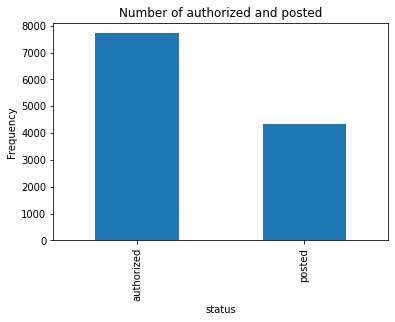

In [211]:
status_counts = pd.value_counts(anz['status'], sort=True).sort_index()
status_counts.plot(kind='bar')
plt.title('Number of authorized and posted')
plt.xlabel('status')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

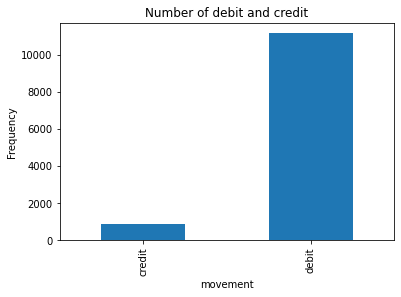

In [212]:
movement_counts = pd.value_counts(anz['movement'], sort=True).sort_index()
movement_counts.plot(kind='bar')
plt.title('Number of debit and credit')
plt.xlabel('movement')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

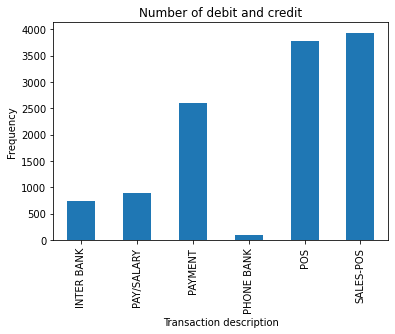

In [213]:
movement_counts = pd.value_counts(anz['txn_description'], sort=True).sort_index()
movement_counts.plot(kind='bar')
plt.title('Number of debit and credit')
plt.xlabel('Transaction description')
plt.ylabel('Frequency')

 Performing the Second Task

In [214]:
anz_salaries = anz[anz['txn_description'] == 'PAY/SALARY'].groupby('account').mean()
anz_salaries.head()

,balance,age,amount
account,,,
ACC-1037050564,3959.400000,40,892.09
ACC-1056639002,49718.081667,22,3195.01
ACC-1199531521,12414.007143,52,3785.78
ACC-1217063613,6884.815000,27,4863.62
ACC-1222300524,1755.892308,38,1002.13


In [215]:
salaries = []
for account in anz['account']:
    salaries.append(int(anz_salaries.loc[account]['amount']))

anz['annual_salary'] = salaries

In [216]:
anz_account = anz.groupby('account').mean()
anz_account.head()

,balance,age,amount,annual_salary
account,,,,
ACC-1037050564,3331.424479,40,74.465019,892
ACC-1056639002,46338.733837,22,265.134767,3195
ACC-1199531521,10162.788961,52,418.742468,3785
ACC-1217063613,4513.148800,27,426.108800,4863
ACC-1222300524,1191.291419,38,78.206106,1002


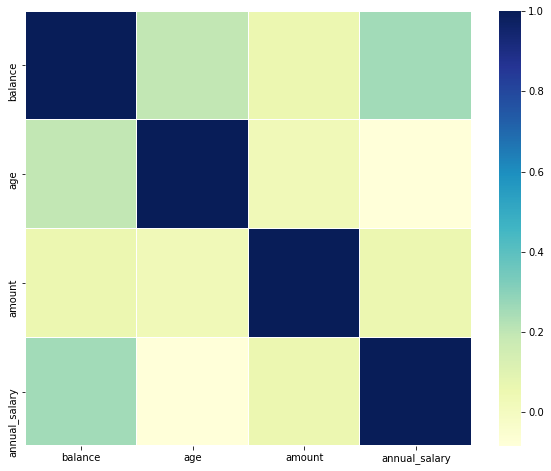

In [217]:
corrmat = anz.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidths=0.1)

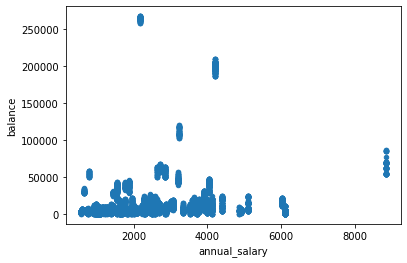

In [241]:
anz.plot.scatter(x='annual_salary',y='balance')

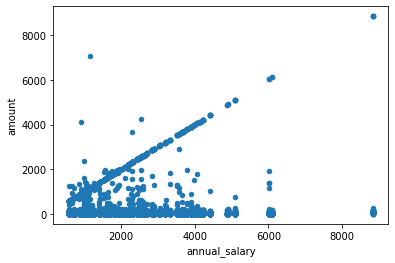

In [242]:
anz.plot.scatter(x='annual_salary',y='amount')

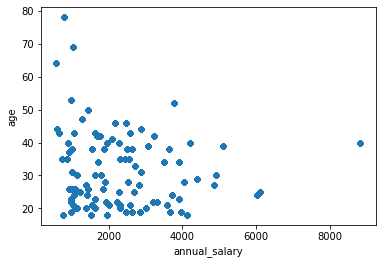

In [243]:
anz.plot.scatter(x='annual_salary',y='age')

In [218]:
X_train = anz_account.drop('annual_salary', axis=1)
y_train = anz_account['annual_salary']
#X_test = anz_account.drop('annual_salary', axis=1)
#y_test = anz_account['annual_salary']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

<IPython.core.display.Javascript object>

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.16507585653168677

In [221]:
model.score(X_test, y_test)

-0.3636786489660706

In [222]:
anz_cat = anz[['txn_description','gender','age','merchant_state','movement','status','merchant_suburb']]

In [223]:
pd.get_dummies(anz_cat).head()

<IPython.core.display.Javascript object>

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,...,merchant_suburb_Yatala,merchant_suburb_Yeppoon,merchant_suburb_Yokine,merchant_suburb_York,merchant_suburb_Yowah,merchant_suburb_Yulara,merchant_suburb_Yungaburra,merchant_suburb_Zetland,merchant_suburb_Zillmere,merchant_suburb_Zuccoli
0,26,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
X_train = pd.get_dummies(anz_cat)
y_train = anz['annual_salary']

<IPython.core.display.Javascript object>

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

<IPython.core.display.Javascript object>

In [226]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8679676146979448

In [227]:
model.predict(X_test)

array([1636, 2179,  917, ..., 1541, 1059, 1002], dtype=int64)

In [228]:
model.score(X_test, y_test)

0.8024076380240763

In [229]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

0.8327887917629279

In [230]:
model1.predict(X_test)

array([1636.        , 2179.        ,  916.80769231, ..., 1541.        ,
       1059.        , 1002.        ])

In [231]:
model1.score(X_test, y_test)

0.6852335595585584